# Inplementation of information-theoretic measures of distributional similarity for NLP

This implementation to measure the information theoretic based on:

1) Entropy

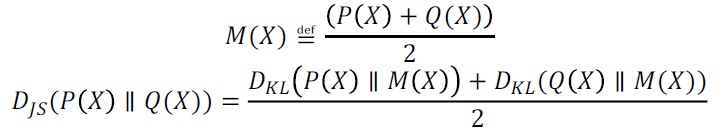

2) Cross entropy

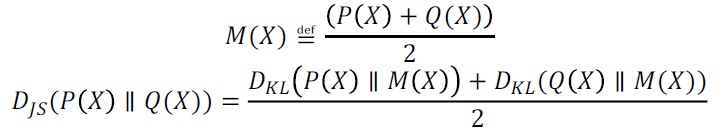

3) Kullback-Leibler divergence

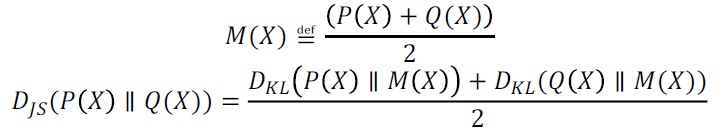

4) Jensen-Shannon divergence

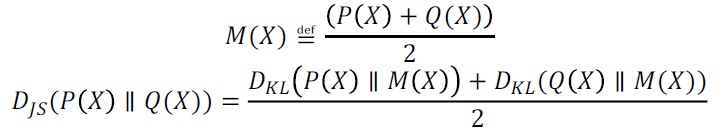

In [14]:
"""Calculate information-theoretic measures of distributional
similarity based on word frequencies in two texts
"""

import collections
import math


def read_words(infile):
    with open(infile) as input_text:
        return [x.strip() for x in input_text.read().split()]


def get_counts(word_list):
    return collections.Counter(word_list)


def create_prob_dist(count_dict):
    total_ct = sum(count_dict.values())
    p = {x: ct / total_ct for x, ct in count_dict.items()}
    return p


def count_smoothing(freq_dist, vocabulary, alpha=1):
    """Implement simple count-based probability smoothing.
    Given a target vocabulary and a set of observed count frequencies,
    calculate a new set of counts so that Count(x) > 0 for all words
    in the target vocabulary.  This is achieved by adding `alpha`
    to each observed count
    """
    return {w: freq_dist.get(w, 0) + alpha for w in vocabulary}


def entropy(p):
    """Calculate entropy H(p) for a probability distribution represented
    as a mapping (dictionary) from word tokens to probabilities
    """
    h = 0

    # TODO -- Calculate entropy value in nats for probability distribution `p`
    for x in p:
        h -= p[x] * math.log(p[x])

    return h


def cross_entropy(p1, p2):
    """Calculate cross-entropy H(p1, p2) for two probability distributions
    represented as a mapping (dictionary) from word tokens to
    probabilities
    """
    xh = 0

    # TODO -- Calculate cross-entropy value H(p1, p2) in nats
    for x in p1:
        xh -= p1[x] * math.log(p2[x])

    return xh


def kl_divergence(p1, p2):
    """Calculate Kullback-Leibler divergence D_{KL}(p1||p2) for two
    probability distributions represented as a mapping (dictionary)
    from word tokens to probabilities
    """
    kl = 0

    # TODO -- Calculate KL divergence D_{KL}(p1||p2) in nats
    kl = cross_entropy(p1, p2) - entropy(p1)

    return kl


def js_divergence(p1, p2):
    """Calculate Jensen-Shannon divergence D_{JS}(p1||p2) for two
    probability distributions represented as a mapping (dictionary)
    from word tokens to probabilities
    """
    js = 0

    # TODO -- Calculate JS divergence D_{JS}(p1||p2) in nats
    m = {k: ((p1.get(k, 0) + p2.get(k, 0))/2.0) for k in p1.keys()}            
    js = (kl_divergence(p1, m) + kl_divergence(p2, m))/2
    
    return js

if __name__ == "__main__":
    """Do not edit this code
    """
    words_a = read_words("test_a.txt")
    words_b = read_words("test_b.txt")

    ct_a = get_counts(words_a)
    ct_b = get_counts(words_b)

    vocab = set(ct_a.keys()) | set(ct_b.keys())
    ct_a = count_smoothing(ct_a, vocab)
    ct_b = count_smoothing(ct_b, vocab)

    p_a = create_prob_dist(ct_a)
    p_b = create_prob_dist(ct_b)

    h_a = entropy(p_a)
    h_b = entropy(p_b)
    xh_ab = cross_entropy(p_a, p_b)
    xh_ba = cross_entropy(p_b, p_a)
    kl_ab = kl_divergence(p_a, p_b)
    kl_ba = kl_divergence(p_b, p_a)
    js_ab = js_divergence(p_a, p_b)
    js_ba = js_divergence(p_b, p_a)

    for metric in [h_a, h_b, xh_ab, xh_ba,
                   kl_ab, kl_ba, js_ab, js_ba]:
        print("{:.3f}".format(metric))


2.672
2.619
2.791
2.746
0.119
0.127
0.030
0.030
